In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
incomedata = pd.read_csv('income_data.csv')

In [3]:
incomedata.head()

,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [4]:
incomedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project Name                 1445 non-null   object 
 1   Neighborhood                 1445 non-null   object 
 2   Zip Code                     1442 non-null   float64
 3   TtlProjUnits                 1445 non-null   int64  
 4   RentUnits                    1445 non-null   int64  
 5   OwnUnits                     1445 non-null   int64  
 6   TtlMarket                    1444 non-null   float64
 7   MarketRent                   1444 non-null   float64
 8   MarketOwn                    1444 non-null   float64
 9   Total Income-Restricted      1445 non-null   int64  
 10  Income-Restricted Rental     1445 non-null   int64  
 11  Income-Restricted Ownership  1444 non-null   float64
 12  Tenure                       1445 non-null   object 
 13  Public/ Private   

<ipython-input-5-839ebeef2f38>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_grouping = incomedata.groupby('Neighborhood').mean()


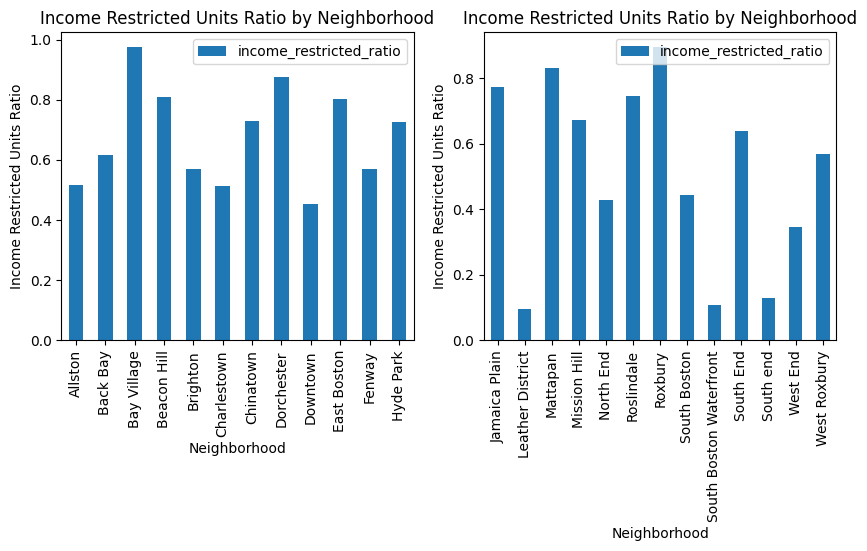

In [5]:
incomedata['income_restricted_ratio'] = incomedata['Total Income-Restricted'] / incomedata['TtlProjUnits']

neighborhood_grouping = incomedata.groupby('Neighborhood').mean()

# Split the graph into two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first half of the graph
neighborhood_grouping.iloc[:len(neighborhood_grouping)//2].plot(kind='bar', y='income_restricted_ratio', ax=axs[0])
axs[0].set_title('Income Restricted Units Ratio by Neighborhood')
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('Income Restricted Units Ratio')

# Plot the second half of the graph
neighborhood_grouping.iloc[len(neighborhood_grouping)//2:].plot(kind='bar', y='income_restricted_ratio', ax=axs[1])
axs[1].set_title('Income Restricted Units Ratio by Neighborhood')
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Income Restricted Units Ratio')

plt.show()

In [11]:
income_per_nh = pd.read_csv('income_per_neighborhood.csv')
income_per_nh = income_per_nh.iloc[:, :-2]
income_per_nh = income_per_nh.drop(index=[0, 1, 2, 3, 4])
income_per_nh = income_per_nh.rename(columns={'Per Capita Income': 'Neighborhood', 'Unnamed: 1': 'Population', 'Unnamed: 2': 'Aggregate Income',
                                              'Unnamed: 3': 'Per Capita Income'})

income_per_nh = income_per_nh.dropna(subset=['Per Capita Income'])

income_per_nh['Per Capita Income'] = income_per_nh['Per Capita Income'].str.replace('$', '').str.replace(',', '').astype(int)
print(income_per_nh.columns)

Index(['Neighborhood', 'Population', 'Aggregate Income', 'Per Capita Income'], dtype='object')


<ipython-input-11-2353ef192e5b>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income_per_nh['Per Capita Income'] = income_per_nh['Per Capita Income'].str.replace('$', '').str.replace(',', '').astype(int)


In [12]:
income_per_nh.head()

,Neighborhood,Population,Aggregate Income,Per Capita Income
5,Allston,"19,261","$657,738,300",34149
6,Back Bay,"17,783","$1,968,165,900",110677
7,Beacon Hill,"9,648","$964,851,000",100005
8,Brighton,"55,297","$2,281,630,300",41261
9,Charlestown,"19,890","$1,498,490,600",75339


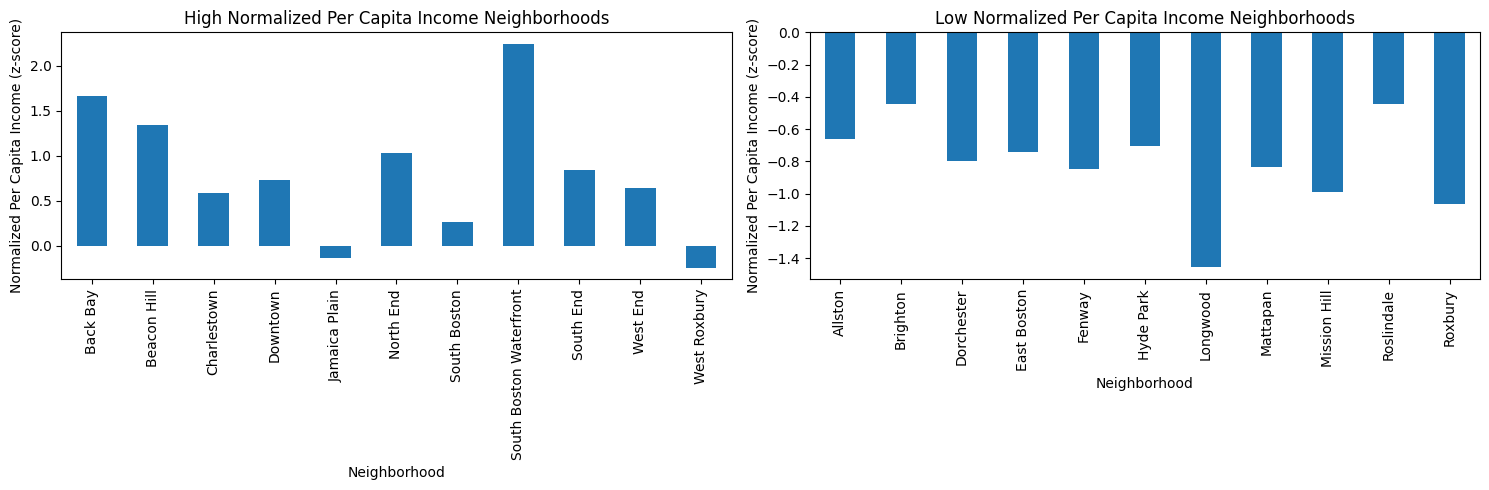

In [18]:
per_capita_income_mean = income_per_nh['Per Capita Income'].mean()
per_capita_income_std = income_per_nh['Per Capita Income'].std()
income_per_nh['z-score'] = (income_per_nh['Per Capita Income'] - per_capita_income_mean) / per_capita_income_std

# median z-score
median_z_score = income_per_nh['z-score'].median()
high_z_score = income_per_nh[income_per_nh['z-score'] >= median_z_score]
low_z_score = income_per_nh[income_per_nh['z-score'] < median_z_score]

# Group the high and low z-score data by neighborhood and plot the results in two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
high_grouped = high_z_score.groupby('Neighborhood')['z-score'].mean()
high_grouped.plot(kind='bar', ax=ax1)
ax1.set_title('High Normalized Per Capita Income Neighborhoods')
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Normalized Per Capita Income (z-score)')

low_grouped = low_z_score.groupby('Neighborhood')['z-score'].mean()
low_grouped.plot(kind='bar', ax=ax2)
ax2.set_title('Low Normalized Per Capita Income Neighborhoods')
ax2.set_xlabel('Neighborhood')
ax2.set_ylabel('Normalized Per Capita Income (z-score)')

plt.tight_layout()
plt.show()